* Name: Riyanshi Goyal
* Roll Number: 12041240
* References Used to Complete the Assignment
    * a. https://towardsdatascience.com/
    * b. https://medium.com/
    * c. https://scikit-learn.org/stable/
    * d. https://www.geeksforgeeks.org/
    * e. https://machinelearningmastery.com/
    * f. tutorials
    * g. class notes

...


# Part 1: NY Taxi Fare Prediction

In [54]:
!pip install -q kaggle 

In [148]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"riyanshigoyal","key":"f8c9c1ffc98b8a9f9428e6dadc71a4d6"}'}

In [149]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [150]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction

new-york-city-taxi-fare-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [151]:
!unzip new-york-city-taxi-fare-prediction

Archive:  new-york-city-taxi-fare-prediction.zip
replace GCP-Coupons-Instructions.rtf? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [152]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [463]:
train = pd.read_csv("/content/train.csv", nrows = 1000000)
test = pd.read_csv("/content/test.csv")

PART 1 --> DATA CLEANSING 

Will perform the following activities
1.   Shape of train and test sets
2.   Check for NaNs and drop them (if any)
3.   Check for outliers and drop them (if any)
4.   Type conversion of relevant fields





In [464]:
train1=train.copy()

In [416]:
train1.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [417]:
# Check no of rows & columns in the dataset
print("Shape of the Training data :", train1.shape)

# See all the columns in the dataset
print("All columns are :", list(train1.columns))

Shape of the Training data : (1000000, 8)
All columns are : ['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [418]:
# Check datatypes & count of not-null values in each field
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


In [419]:
#check for missing values in train data
train1.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [420]:
#check for missing values in test data
test.isnull().sum()


key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [465]:
#drop the missing values
train1=train1.dropna(how='any')

In [422]:
#after dropping the null values
train1.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [466]:
#Look for no. of non-positive fare_amount values.
train1[train1['fare_amount']<=0].count()

key                  67
fare_amount          67
pickup_datetime      67
pickup_longitude     67
pickup_latitude      67
dropoff_longitude    67
dropoff_latitude     67
passenger_count      67
dtype: int64

#A. Data Cleaning and Visualization:

In [467]:
# Remove the non-positive fare_amount values.
train1=train1[train1['fare_amount']>0]

In [425]:
train1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999923.000000,999923.000000,999923.000000,999923.000000,999923.000000,999923.000000
mean,11.348945,-72.526826,39.929108,-72.528356,39.920225,1.684955
std,9.821201,12.057522,7.626026,11.323010,8.200913,1.323921
min,0.010000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734047,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967095,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


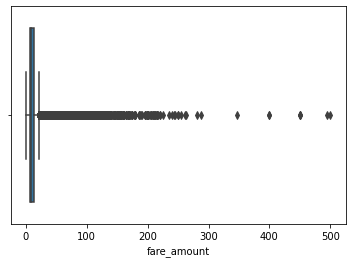

In [426]:
sns.boxplot(x=train1['fare_amount'])

##REMOVE OUTLIERS

In [468]:
#Remove outliers

train1=train1[(train1['fare_amount']<350) & (train1['fare_amount']>=3)]
train1=train1[train1['passenger_count']<=6]

train1.shape

(993484, 8)

In [469]:
# There are also unrealistic latitude/longitude data in the description. We can only take the latitude/longitude of New York.
#the range of longitude and latitude of New York
# Longitude: 71° 47' 25" W to 79° 45' 54" W Latitude: 40° 29' 40" N to 45° 0' 42" N.

train1 = train1[(train1['pickup_latitude']>40)&(train1['pickup_latitude']<45)]
train1 = train1[(train1['dropoff_latitude']>40)&(train1['dropoff_latitude']<45)]

train1 = train1[(train1['pickup_longitude']<-71)&(train1['pickup_longitude']>-79)]
train1 = train1[(train1['dropoff_longitude']<-71)&(train1['dropoff_longitude']>-79)]

**Next let us explore the pickup latitude and longitudes**, 

Googling gave me this info
*   Latitudes range from -90 to 90.
*   Longitudes range from -180 to 180.

The above describe clearly shows some outliers. Let's filter them


Check the data types of each column

In [470]:
train1=train1[(train1['pickup_longitude']>=-180) & (train1['dropoff_longitude']>=-180) & (train1['pickup_longitude']<=180) & (train1['dropoff_longitude']<=180)]
train1=train1[(train1['pickup_latitude']>=-90) & (train1['dropoff_latitude']>=-90) & (train1['pickup_latitude']<=90) & (train1['dropoff_latitude']<=90)]

train1.shape

(973406, 8)

In [431]:
train1.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

key and pickup_datetime seem to be datetime columns which are in object format. Let's convert them to datetime

In [471]:
train1['key'] = pd.to_datetime(train1['key'])
train1['pickup_datetime']  = pd.to_datetime(train1['pickup_datetime'])

In [472]:
#Convert for test data
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [473]:
#check the dtypes after conversion
train1.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [474]:
test.dtypes

key                       datetime64[ns]
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

Now, for **EDA**. The following are my considerations - 
1. Does the number of passengers affect the fare? 
2. Does the date and time of pickup affect the fare?
3. Does the day of the week affect the fare?
4. Does the distance travelled affect the fare?

First, let's split the datetime field 'pickup_datetime' to the following - 
* year
* month
* date
* hour
* day of week

Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare.
Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

We can calulate the distance in a sphere when latitudes and longitudes are given by [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula)

**haversine(θ) = sin²(θ/2)**

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

**a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)**

**c = 2 * atan2( √a, √(1−a) )**

**d = R ⋅ c**

**d = Haversine distance**

*Refer [this](https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula) page for more info and examples on Haversine formula*

Is this distance equal to the road travel distance? Do we have to do something else?


In [475]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train1, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [476]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

Now that we have calculated the distance, we shall create columns for the following -


*   year
*   month
*   date
*   hour
*   day of week






In [477]:
data = [train1,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [478]:
train1.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7


**1. Does the number of passengers affect the fare?**

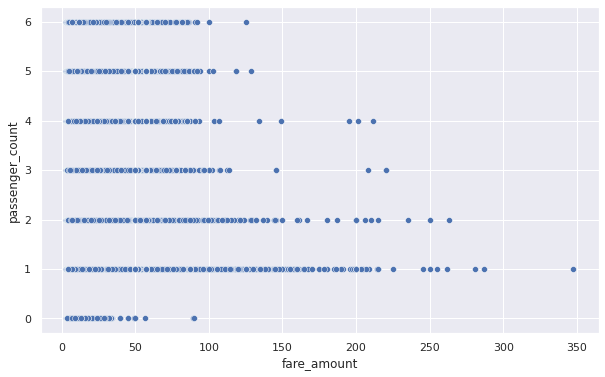

In [490]:
sns.scatterplot(x=train1['fare_amount'], y=train1['passenger_count'])

Passengers vary between 1-6. Usually the number of passengers travelling in 1 booked taxi 1

Text(0, 0.5, 'Frequency')

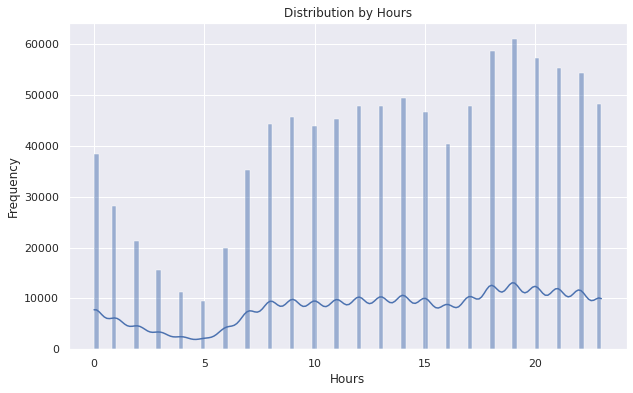

In [485]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.histplot(data=train1, x="Hour", kde=True)
plt.title("Distribution by Hours")
plt.xlabel('Hours')
plt.ylabel('Frequency')

Number of cabs booked at 5:00am is relatively less than others 

**2. Does the date and time of pickup affect the fare?**

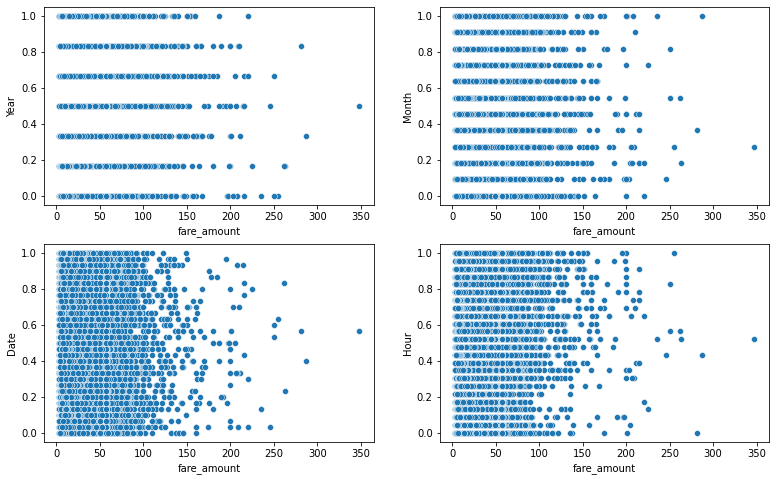

In [443]:
fig, axes = plt.subplots(2, 2)


sns.scatterplot(data=train1, x='fare_amount', y='Year', ax=axes[0,0])
sns.scatterplot(data=train1, x='fare_amount', y='Month', ax=axes[0,1])
sns.scatterplot(data=train1, x='fare_amount', y='Date', ax=axes[1,0])
sns.scatterplot(data=train1, x='fare_amount', y='Hour', ax=axes[1,1])

fig.set_size_inches(13, 8)
plt.show()

**3. Does the day of the week affect the fare?**

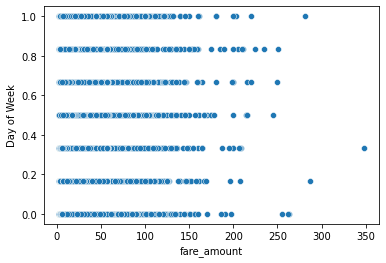

In [444]:
sns.scatterplot(data=train1, x="fare_amount", y="Day of Week")

(0.0, 7.0)

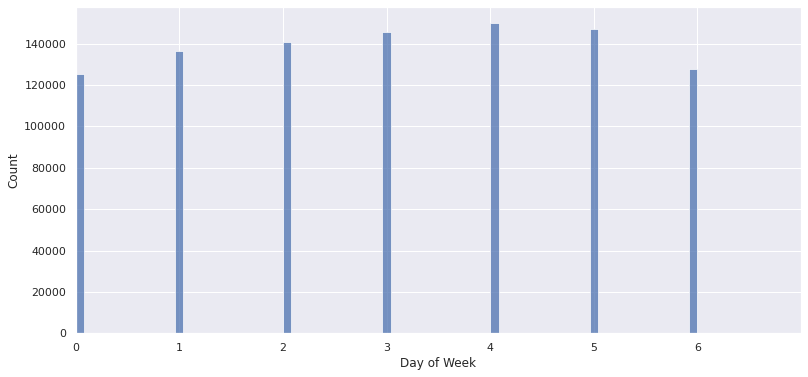

In [493]:
sns.histplot(data=train1,x="Day of Week",kde=False)
plt.xticks(np.arange(0, 7, step=1))
plt.gcf().set_size_inches(13,6)
plt.xlim(0,7)

the demand of taxi does not depend much on the day of the week. It is nearly same for all the days but is a bit higher during the middle of the week

**4. Does the distance affect the fare?**

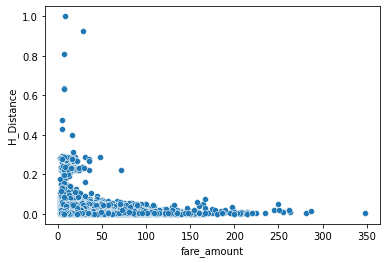

In [445]:
sns.scatterplot(data=train1, x="fare_amount", y="H_Distance")

(0.0, 30.0)

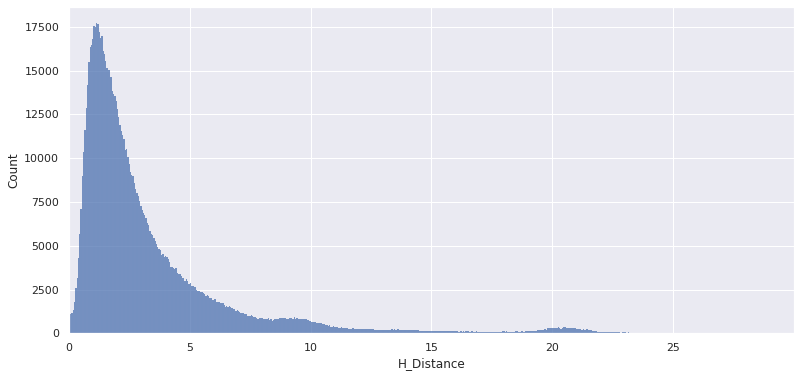

In [494]:
sns.histplot(data=train1,x="H_Distance",kde=False)
plt.xticks(np.arange(0, 30, step=5))
plt.gcf().set_size_inches(13,6)
plt.xlim(0,30)

this shows that a very few people travel large distances. most travel small distances using taxi

In [ ]:
train1_y=train1['fare_amount']
print(train1_y)

0          4.5
1         16.9
2          5.7
3          7.7
4          5.3
          ... 
999995     7.0
999996     7.3
999997    10.5
999998     6.9
999999     4.1
Name: fare_amount, Length: 973406, dtype: float64


#B. Data Scaling:

In [ ]:
#scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_scaled=scaler.fit_transform(train1[['passenger_count','H_Distance','Year','Month','Date','Day of Week','Hour']]) 
train1=pd.DataFrame(train_scaled,columns=['passenger_count','H_Distance','Year','Month','Date','Day of Week','Hour'])
train1['fare_amount']=train1_y
train1.head()

,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour,fare_amount
0,0.166667,0.002426,0.000000,0.454545,0.466667,0.000000,0.739130,4.5
1,0.166667,0.019890,0.166667,0.000000,0.133333,0.166667,0.695652,16.9
2,0.333333,0.003271,0.333333,0.636364,0.566667,0.500000,0.000000,5.7
3,0.166667,0.006589,0.500000,0.272727,0.666667,0.833333,0.173913,7.7
4,0.166667,0.004706,0.166667,0.181818,0.266667,0.166667,0.304348,5.3


#C. Building a Pipeline:

In [446]:
train1_2=train.copy()
test1_2=test.copy()

In [447]:
#building a pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



In [448]:
#drop NULL values
class drop_null(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
            
    # Transform updates all NaN values with median
    def transform(self, X):
        return X.dropna(how='any')

In [449]:
class removie_outliers(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
            
    # Transform updates all NaN values with median
    def transform(self, X):
        if('fare_amount' in X.columns):
          X=X[(X['fare_amount']<350) & (X['fare_amount']>=3) ]
        X=X[(X['pickup_longitude']>=-180) & (X['dropoff_longitude']>=-180) & (X['pickup_longitude']<=180) & (X['dropoff_longitude']<=180)]
        X=X[(X['pickup_latitude']>=-90) & (X['dropoff_latitude']>=-90) & (X['pickup_latitude']<=90) & (X['dropoff_latitude']<=90)]
        X=X[X['passenger_count']<=6]
        X = X[(X['pickup_latitude']>40)&(X['pickup_latitude']<45)]
        X = X[(X['dropoff_latitude']>40)&(X['dropoff_latitude']<45)]
        train1 = X[(X['pickup_longitude']<-71)&(X['pickup_longitude']>-79)]
        X = X[(X['dropoff_longitude']<-71)&(X['dropoff_longitude']>-79)]
        return X

In [450]:
def pipe_haversine_distance(i,lat1, long1, lat2, long2):
   
    
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
        return d



In [451]:
train1_2['key'] = pd.to_datetime(train1_2['key'])
train1_2['pickup_datetime']  = pd.to_datetime(train1_2['pickup_datetime'])

test1_2['key'] = pd.to_datetime(test1_2['key'])
test1_2['pickup_datetime']  = pd.to_datetime(test1_2['pickup_datetime'])

In [452]:
#adding new_features
class add_features(BaseEstimator, TransformerMixin):
    # We are calculating three new features. we are taking which combinations to take or leave
    def __init__(self, Year=True, Month=True, Date=True, Day_of_Week=True,Hour=True,H_Distance=True):
        self.Year = Year
        self.Month = Month
        self.Date = Date
        self.Day_of_Week= Day_of_Week
        self.Hour=Hour
        self.H_Distance=H_Distance
    
    # Fit have no work, as nothing to train or calclate
    def fit(self, X, y=None):
        return self
    
    # In transform, we are adding all new features
    def transform(self, X):
        
        if self.Year:
            X["Year"] = X["pickup_datetime"].dt.year
        if self.Month:
            X["Month"] = X["pickup_datetime"].dt.month
        if self.Date:
            X["Date"] = X["pickup_datetime"].dt.day
        if self.Date:
            X["Day_of_Week"] = X["pickup_datetime"].dt.dayofweek
        if self.Date:
            X["Hour"] = X["pickup_datetime"].dt.hour
        if self.H_Distance:
          pipe_haversine_distance(X,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
        return X

In [453]:
#scaling
class train_scaling(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
            
    # Transform updates all NaN values with median
    def transform(self, X):
      scaler = MinMaxScaler()
      train_scaled_X=scaler.fit_transform(X[['passenger_count','H_Distance','Year','Month','Date','Day_of_Week','Hour']]) 
      Y_train=X['fare_amount']
            
      return train_scaled_X, Y_train

In [454]:
#scaling
class test_scaling(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
            
    # Transform updates all NaN values with median
    def transform(self, X):
      scaler = StandardScaler()
      test_scaled_X=scaler.fit_transform(X[['passenger_count','H_Distance','Year','Month','Date','Day_of_Week','Hour']]) 
            
      return test_scaled_X

In [455]:
pre_pipe = Pipeline([
    ('dropna', drop_null()),
    ('remove', removie_outliers()),
    ('add', add_features()),
    ('scale', train_scaling())
])

pre_pipe_test = Pipeline([
    ('add_test', add_features()),
    ('scale_test', test_scaling())
])


# we are calling fit_transform() on pipeline, so the pipeline is learning parameters from input data.
# Later it also transforms the input data as per the "transform()" definition of each object
X_train,Y_train = pre_pipe.fit_transform(train1_2)
test_prepared_X = pre_pipe_test.fit_transform(test1_2)

print(X_train.shape)
print(Y_train.shape)

(973513, 7)
(973513,)


In [456]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor

linear = LinearRegression()
model= SGDRegressor()

#D. Use of Validation Set and Cross Validation Approach:

In [457]:
from statistics import mean 
#k fold validation

#we will assume k to be 5 as the data set is quite large
k=10
def k_fold(k,X_train,Y_train):

  x = int(X_train.shape[0] / k)   # x is the size of each fold
  Y_train=np.array(Y_train)                                                          

  RMSE_kfold=[]
  r2_kfold=[] 
  for i in range(k):
    x_copy=X_train
    y_copy=Y_train

    fold_x=x_copy[x*i:x*(i+1)] 
    rest_data_x=np.delete(x_copy,slice(x*i, x*(i+1)),0) 

    fold_y=y_copy[x*i:x*(i+1)]
    rest_data_y=np.delete(y_copy,slice(x*i, x*(i+1)),0) 

    model.fit(rest_data_x,rest_data_y)
    y_predict = model.predict(fold_x)
    r2_kfold.append(r2_score(fold_y, y_predict)) 
    RMSE_kfold.append(mean_squared_error(fold_y, y_predict, squared=False))
  return RMSE_kfold,r2_kfold

RMSE_kfold,r2_kfold=k_fold(10,X_train,Y_train)

rmse_mean=mean(RMSE_kfold) 
r2_mean=mean(r2_kfold)
print("RMSE: ",RMSE_kfold)
print("r2: ",r2_kfold)
print("AVG RMSE: ",rmse_mean)
print("AVG r2: ",r2_mean)

RMSE:  [9.609235848927723, 9.63330362209234, 9.675884711726605, 9.649296182884598, 9.562033479036758, 9.450922781513754, 9.66583178338564, 9.591946373640244, 9.517396527173535, 9.64845820582334]
r2:  [0.017034620839991188, 0.01613579227044004, 0.017489083024611607, 0.01765694020954567, 0.018012718438304542, 0.017698541802076972, 0.016744382274909375, 0.016944436318515166, 0.016666062757572986, 0.01553965003279234]
AVG RMSE:  9.600430951620453
AVG r2:  0.01699222279687599


In [495]:
from sklearn.model_selection import GridSearchCV 

param = {
    'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }
 

# define search
search = GridSearchCV(model, param, scoring='neg_mean_absolute_error')

# execute search
result = search.fit(X_train, Y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -5.911787842850507
Best Hyperparameters: {'alpha': 0.0001}


In [459]:
#This shows that alpha=0.0001 is the hyperparameter for our model stochastic gradient descent

# E. LINEAR REGRESION

In [248]:
from sklearn.model_selection import train_test_split
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

## A) Matrix Based:

In [498]:
#using library
linear.fit(x_train_split, y_train_split)
y_train_predict = linear.predict(x_test_split)
r2_train = r2_score(y_test_split, y_train_predict)
RMSE_train = mean_squared_error(y_test_split, y_train_predict, squared=False)

print("r2 score:", r2_train)
print("rmse :" ,RMSE_train)

r2 score: 0.018984155756350596
rmse : 9.71430236792685


In [497]:
#using matrix
X_train.shape[0]
ones = np.ones((X_train.shape[0],1))
A = np.hstack((ones,X_train))
w= np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T), Y_train)

#w is the equation finally obtained
print("the equation finally obtained: y=Wx where W is the following weight matrix")
print(w)

the equation finally obtained: y=Wx where W is the following weight matrix
[ 9.25971525e+00  5.66859211e-01  5.08857779e+01  3.73702447e+00
  1.21273843e+00  1.12406707e-01 -1.51203896e-02 -6.92191647e-01]


##B) Optimization Based:

In [496]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(alpha=0.0001)

sgd.fit(x_train_split, y_train_split)
y_predict_opt = sgd.predict(x_test_split)

rmse_opt = mean_squared_error(y_test_split, y_predict_opt,squared=False)
r2_opt = r2_score(y_test_split, y_predict_opt)
print("AVG rmse:", rmse_opt)
print("AVG r2:", r2_opt)


AVG rmse: 9.722289037886997
AVG r2: 0.017370396930949772


##C) Non-parametric

In [499]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train_split, y_train_split)
y_predict_nonpara = regressor.predict(x_test_split)

rmse_nonpara = mean_squared_error(y_test_split, y_predict_opt,squared=False)
r2_nonpara = r2_score(y_test_split, y_predict_nonpara)
print("AVG rmse:", rmse_nonpara)
print("AVG r2:", r2_nonpara)


AVG rmse: 9.722289037886997
AVG r2: 0.5555367432155334


##model testing

In [502]:
#as RMSE is least with linear regression. we will use that model.
linear.fit(X_train, Y_train)
y_predict = linear.predict(test_prepared_X)

print(y_predict)


[ -0.60591405   0.7019588  -27.54803473 ... 217.84537101  79.96307456
 -13.27772177]
